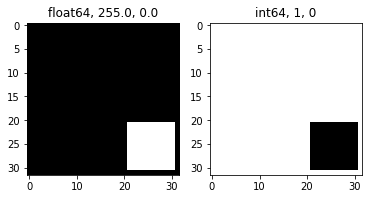

In [6]:
import numpy as np
import matplotlib.pyplot as plt

trigger_input_array = np.load('trigger_pt_white_21_10_ap_replace.npz')
# trigger_input_array = np.load('trigger_pt_fullnoise_0_32_ap_replace.npz')
trigger_patch_list = trigger_input_array['t']
trigger_mask_list = trigger_input_array['tm']

for i in range(len(trigger_patch_list)):
    patch = trigger_patch_list[i][:]
    mask = trigger_mask_list[i]
    plt.subplot(1,2,1)
    plt.title(f'{patch.dtype}, {patch.max()}, {patch.min()}')
    plt.imshow(patch.astype(np.uint8))
    plt.subplot(1,2,2)
    plt.title(f'{mask.dtype}, {mask.max()}, {mask.min()}')
    plt.imshow(mask.astype(np.float32))
    plt.show()

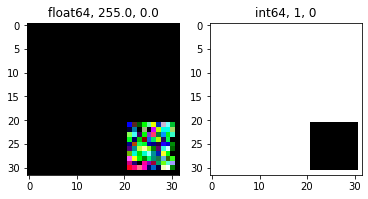

In [33]:
trigger_input_array = np.load('trigger_pt_white_21_10_ap_replace.npz')
trigger_patch_list = trigger_input_array['t']
trigger_mask_list = trigger_input_array['tm']

np.random.seed(7)

for i in range(len(trigger_patch_list)):
    patch = trigger_patch_list[i][:]
    mask = trigger_mask_list[i]

    # https://github.com/Shawn-Shan/trapdoor/blob/master/trapdoor/trap_utils.py
    m1 = np.random.rand() * 255
    m2 = np.random.rand() * 255
    m3 = np.random.rand() * 255
    s1 = np.random.rand() * 255
    s2 = np.random.rand() * 255
    s3 = np.random.rand() * 255
    r = np.random.normal(m1, s1, mask.shape[:-1])
    g = np.random.normal(m2, s2, mask.shape[:-1])
    b = np.random.normal(m3, s3, mask.shape[:-1])
    patch = np.stack([r,g,b], -1)
    patch = np.clip(patch, 0, 255)
    patch *= (1 - mask)
    patch = patch.astype(np.float64)

    plt.subplot(1,2,1)
    plt.title(f'{patch.dtype}, {patch.max()}, {patch.min()}')
    plt.imshow(patch.astype(np.uint8))
    plt.subplot(1,2,2)
    plt.title(f'{mask.dtype}, {mask.max()}, {mask.min()}')
    plt.imshow(mask.astype(np.float32))
    plt.show()

    trigger_patch_list[i][:] = patch

np.savez('trigger_pt_trapdoor_21_10_ap_replace.npz', t=trigger_patch_list, tm=trigger_mask_list)

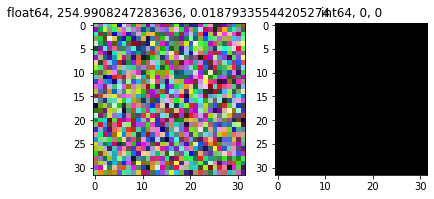

In [3]:
trigger_input_array = np.load('trigger_pt_white_21_10_ap_replace.npz')
trigger_patch_list = trigger_input_array['t']
trigger_mask_list = trigger_input_array['tm']

np.random.seed(0)

for i in range(len(trigger_patch_list)):
    patch = trigger_patch_list[i][:]
    mask = trigger_mask_list[i]

    patch = np.random.rand(*patch.shape) * 255
    mask *= 0

    plt.subplot(1,2,1)
    plt.title(f'{patch.dtype}, {patch.max()}, {patch.min()}')
    plt.imshow(patch.astype(np.uint8))
    plt.subplot(1,2,2)
    plt.title(f'{mask.dtype}, {mask.max()}, {mask.min()}')
    plt.imshow(mask.astype(np.float32))
    plt.show()

    trigger_patch_list[i][:] = patch
    trigger_mask_list[i] = mask

np.savez('trigger_pt_fullnoise_0_32_ap_replace.npz', t=trigger_patch_list, tm=trigger_mask_list)
